## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Datasets

In [ ]:
cocacola_data=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
cocacola_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## Data Understanding

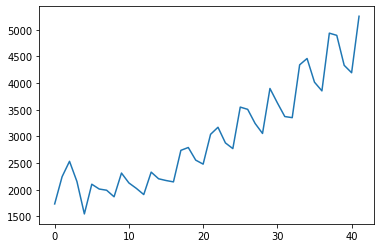

In [ ]:
cocacola_data.Sales.plot()

In [ ]:
cocacola_data.shape

(42, 2)

In [ ]:
cocacola_data.dtypes

Quarter     object
Sales      float64
dtype: object

In [ ]:
cocacola_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
cocacola_data[cocacola_data.duplicated()]

,Quarter,Sales


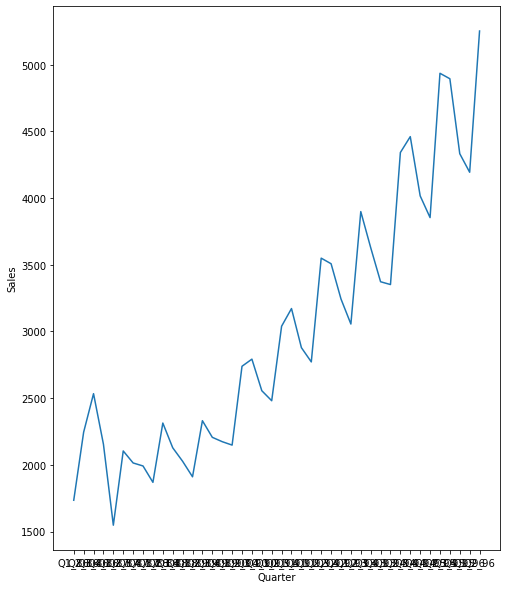

In [ ]:
plt.figure(figsize=(8,10))
sns.lineplot(x=cocacola_data['Quarter'],y=cocacola_data['Sales'])
plt.show()

In [ ]:
Quat = pd.Series(cocacola_data.Quarter)
quat=[]
for i in range (len(cocacola_data)):
    val= Quat[i]
    quat.append(val[0:2])
quat = pd.DataFrame({"quat":quat})
quat = pd.get_dummies(quat)

In [ ]:
cocacola_data=pd.concat([cocacola_data, quat], axis=1)
cocacola_data.head(6)

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4
0,Q1_86,1734.827000,1,0,0,0
1,Q2_86,2244.960999,0,1,0,0
2,Q3_86,2533.804993,0,0,1,0
3,Q4_86,2154.962997,0,0,0,1
4,Q1_87,1547.818996,1,0,0,0
5,Q2_87,2104.411995,0,1,0,0


In [ ]:
t=list(range(0,len(cocacola_data)))
cocacola_data['t']=pd.DataFrame(t)
cocacola_data.head(6)

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t
0,Q1_86,1734.827000,1,0,0,0,0
1,Q2_86,2244.960999,0,1,0,0,1
2,Q3_86,2533.804993,0,0,1,0,2
3,Q4_86,2154.962997,0,0,0,1,3
4,Q1_87,1547.818996,1,0,0,0,4
5,Q2_87,2104.411995,0,1,0,0,5


In [ ]:
cocacola_data['t_square'] =cocacola_data['t']*cocacola_data['t']
cocacola_data

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,0,0
1,Q2_86,2244.960999,0,1,0,0,1,1
2,Q3_86,2533.804993,0,0,1,0,2,4
3,Q4_86,2154.962997,0,0,0,1,3,9
4,Q1_87,1547.818996,1,0,0,0,4,16
5,Q2_87,2104.411995,0,1,0,0,5,25
6,Q3_87,2014.362999,0,0,1,0,6,36
7,Q4_87,1991.746998,0,0,0,1,7,49
8,Q1_88,1869.049999,1,0,0,0,8,64
9,Q2_88,2313.631996,0,1,0,0,9,81


In [ ]:
import numpy as np
cocacola_data['Sales_Log']=np.log(cocacola_data['Sales'])
cocacola_data

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,Sales_Log
0,Q1_86,1734.827000,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,1,0,0,0,4,16,7.344602
5,Q2_87,2104.411995,0,1,0,0,5,25,7.651791
6,Q3_87,2014.362999,0,0,1,0,6,36,7.608058
7,Q4_87,1991.746998,0,0,0,1,7,49,7.596767
8,Q1_88,1869.049999,1,0,0,0,8,64,7.533186
9,Q2_88,2313.631996,0,1,0,0,9,81,7.746574


# Splitting data

In [ ]:
Train=cocacola_data.head(36)
Test=cocacola_data.tail(6)
Test

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,Sales_Log
36,Q1_95,3854.0,1,0,0,0,36,1296,8.256867
37,Q2_95,4936.0,0,1,0,0,37,1369,8.504311
38,Q3_95,4895.0,0,0,1,0,38,1444,8.495970
39,Q4_95,4333.0,0,0,0,1,39,1521,8.374015
40,Q1_96,4194.0,1,0,0,0,40,1600,8.341410
41,Q2_96,5253.0,0,1,0,0,41,1681,8.566555


In [ ]:
#Linear Model
linear_model=smf.ols('Sales~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


667.4256979280367

In [ ]:
#Exponential

Expo_model=smf.ols('Sales_Log~t',data=Train).fit()
pred_Expo=pd.Series(Expo_model.predict(pd.DataFrame(Test['t'])))
pred_Expo=np.exp(pred_Expo)
rmse_Expo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Expo))**2))
rmse_Expo


526.7672615478252

In [ ]:
#Quadratic 

Quad_model=smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad=pd.Series(Quad_model.predict(pd.DataFrame(Test[['t','t_square']])))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

485.14067020703925

In [ ]:
#Additive seasonality 

Add_sea_model=smf.ols('Sales~quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=Train).fit()
pred_Add_sea=pd.Series(Add_sea_model.predict(pd.DataFrame(Test[['quat_Q1','quat_Q2','quat_Q3','quat_Q4']])))
rmse_Add_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Add_sea))**2))
rmse_Add_sea


1895.5593132150468

In [ ]:
#Additive Seasonality Quadratic 

Add_Sec_quad_model=smf.ols('Sales~t+t_square+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=Train).fit()
pred_Add_Sec_quad=pd.Series(Add_Sec_quad_model.predict(pd.DataFrame(Test[['t','t_square','quat_Q1','quat_Q2','quat_Q3','quat_Q4']])))
rmse_Add_Sec_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Add_Sec_quad))**2))
rmse_Add_Sec_quad
#pred_Add_Sec_quad=pd.DataFrame(pred_Add_Sec_quad,columns=['Passengers'])
#pred_Add_Sec_quad

283.06196057018724

In [ ]:
##Multiplicative Seasonality

Mul_model=smf.ols('Sales_Log~quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=Train).fit()
pred_Mul=pd.Series(Mul_model.predict(pd.DataFrame(Test[['quat_Q1','quat_Q2','quat_Q3','quat_Q4']])))
pred_Mul=np.exp(pred_Mul)
rmse_Mul=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Mul))**2))
rmse_Mul

1980.5341136713096

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea_model=smf.ols('Sales_Log~t+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=Train).fit()
pred_Mul_Add_sea=pd.Series(Mul_Add_sea_model.predict(pd.DataFrame(Test[['t','quat_Q1','quat_Q2','quat_Q3','quat_Q4']])))
pred_Mul_Add_sea=np.exp(pred_Mul_Add_sea)
rmse_Mul_Add_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Mul_Add_sea))**2))
rmse_Mul_Add_sea

323.21275367142715

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Expo","rmse_Quad","rmse_Add_sea","rmse_Add_Sec_quad","rmse_Mul","rmse_Mul_Add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Expo,rmse_Quad,rmse_Add_sea,rmse_Add_Sec_quad,rmse_Mul,rmse_Mul_Add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_Add_Sec_quad,283.061961
6,rmse_Mul_Add_sea,323.212754
2,rmse_Quad,485.140670
1,rmse_Expo,526.767262
0,rmse_linear,667.425698
3,rmse_Add_sea,1895.559313
5,rmse_Mul,1980.534114


 ## RMSE value for the Additive Seasonality with Quadratic Trend Model is lowest so we can use this model for the Forcasting.